#Project Brief
This is the python notebook for a live sentiment analysis scraper for twitter. It takes in topics that are input from the user and sends them through the Twitter API to find tweets correlating to the topic. 

# Imports and Authorisation

In [ ]:
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy #Twitter data Handling
from tweepy import OAuthHandler
pd.set_option("display.max_colwidth", -1)
import re

from textblob import TextBlob #Sentiment Analysis

from wordcloud import WordCloud #Plotting wordcloud

import string #Removing punctuation

import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords #Removing stopwords


print("libraries set")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
libraries set


In [ ]:
#Twitter keys
from tweepy import OAuthHandler
consumer_key = "2n1KPD1TwAmTBXgw0GRjsoswq"
consumer_secret = "SqCsm7asKLho3pebXjrmLsl0Gyllo3GXFNNShA8IR4rVKIHRBw" #consumer secret
access_token= "3394460153-7iYrs2SOG3A7cpFsGnKp7bjXOxQeWoXiZSWudN4"
access_secret= "Nw1xVT1O8dKwRKVwmoLXhnP4IDBQ954FaLs4UYF27LHF3" #access secret

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
print("connection set")

connection set


In [ ]:
#Establish the Df with all the tweet features
#Date, user, if user is verified, tweet, Likes, Retweets, user_location

tweets_df = pd.DataFrame(columns = ["date","user","is_verified","tweet","likes","RT",'user_location'])
print(tweets_df)

Empty DataFrame
Columns: [date, user, is_verified, tweet, likes, RT, user_location]
Index: []


# Tweet Extraction Function 

In [ ]:
#Write a function using tweepy.cusor() to find tweets on a certain topic
def get_tweets(topic, count):
  #run through a corpus of tweets
  i = 0
  for tweet in tweepy.Cursor(api.search, q = topic, count = 100, lang="en",exclude='retweets').items():
    print(i, end= "\r")
    tweets_df.loc[i, "date"] = tweet.created_at
    tweets_df.loc[i, "user"]= tweet.user.name
    tweets_df.loc[i, "is_verified"] = tweet.user.verified
    tweets_df.loc[i, "tweet"]= tweet.text
    tweets_df.loc[i, "likes"] = tweet.retweet_count
    tweets_df.loc[i, "user_location"] = tweet.user.location
    tweets_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Analysis/TweetDataset.csv",index=False)
    tweets_df.to_excel('{}.xlsx'.format("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Analysis/TweetDataset"),index=False)   ## Save as Excel
    i=i+1
    if i> count:
      break
    else:
      pass



In [ ]:
Topic=["Batman"]
get_tweets(Topic , count=100)

In [ ]:
tweets_df

,date,user,is_verified,tweet,likes,RT,user_location
0,2022-01-19 19:44:02,Darla Anne Resists,False,"The Best Photos From The B&amp;W Child Photography Photo Contest Of 2016\n\n#1 Batman By Anna Kuncewicz, Poland (1st Plac… https://t.co/EvPGnymPEg",0,NaN,"Texas, USA"
1,2022-01-19 19:44:02,Ian Riddaway 💙,False,"@neilriddaway … I’m trying to keep it so I know as little as possible, but, much like the upcoming Batman film, I can’t help but look! 😂",0,NaN,Weaveworld
2,2022-01-19 19:44:00,Q..uébec A N🍊N!,False,Batman references on Fox this am🤔\nhttps://t.co/lRWlq9mbT5 https://t.co/mMXdPAxm0M,0,NaN,
3,2022-01-19 19:44:00,Kayniac,False,But they won’t so f*ck them and the batman\n#BoycottWB #IStandWithRayFisher https://t.co/SfRcPbtJXw,0,NaN,Metropolis
4,2022-01-19 19:43:54,🟢⚪,False,There is only one BATMAN #TheBatman https://t.co/mwVGcrTteU https://t.co/bbOeJnhYwj,0,NaN,MilkyWay
...,...,...,...,...,...,...,...
96,2022-01-19 19:36:41,The Northland FAN - 106.5/560,False,Police Accidentally Send ‘Batman’-Themed Mass Text Alert Looking for the Jokermobile https://t.co/hZebKEvoZP,0,NaN,"Duluth, Minnesota"
97,2022-01-19 19:36:34,Valerie D'Orazio,False,Where Val Kilmer at in that Batman poll??? https://t.co/0Wx5XZrzJZ https://t.co/OHdIC2frSM,0,NaN,
98,2022-01-19 19:36:24,E. E. D. Esqueda,False,Man...Black Panther really is a better Batman than bats could ever be\n.\nJust remembering how big of a loss losing C… https://t.co/jTU8Uf4kZ7,0,NaN,"Houston, TX"
99,2022-01-19 19:36:21,Movie titles,False,".Dirty real green , you blue Batman Wars World Of . Terminator Day! Armagedon Saving Black Man Twilight and The Of… https://t.co/x6YTOv6MNl",0,NaN,


#Cleaning the Tweets
clean the tweets using regex

In [ ]:
def clean_tweet(tweet):
  return " ".join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [ ]:
tweets_df["clean_tweet"] = tweets_df['tweet'].apply(clean_tweet)

In [ ]:
tweets_df

,date,user,is_verified,tweet,likes,RT,user_location,clean_tweet
0,2022-01-19 19:44:02,Darla Anne Resists,False,"The Best Photos From The B&amp;W Child Photography Photo Contest Of 2016\n\n#1 Batman By Anna Kuncewicz, Poland (1st Plac… https://t.co/EvPGnymPEg",0,NaN,"Texas, USA",the best photos from the b amp w child photography photo contest of 2016 1 batman by anna kuncewicz poland 1st plac
1,2022-01-19 19:44:02,Ian Riddaway 💙,False,"@neilriddaway … I’m trying to keep it so I know as little as possible, but, much like the upcoming Batman film, I can’t help but look! 😂",0,NaN,Weaveworld,i m trying to keep it so i know as little as possible but much like the upcoming batman film i can t help but look
2,2022-01-19 19:44:00,Q..uébec A N🍊N!,False,Batman references on Fox this am🤔\nhttps://t.co/lRWlq9mbT5 https://t.co/mMXdPAxm0M,0,NaN,,batman references on fox this am
3,2022-01-19 19:44:00,Kayniac,False,But they won’t so f*ck them and the batman\n#BoycottWB #IStandWithRayFisher https://t.co/SfRcPbtJXw,0,NaN,Metropolis,but they won t so f ck them and the batman boycottwb istandwithrayfisher
4,2022-01-19 19:43:54,🟢⚪,False,There is only one BATMAN #TheBatman https://t.co/mwVGcrTteU https://t.co/bbOeJnhYwj,0,NaN,MilkyWay,there is only one batman thebatman
...,...,...,...,...,...,...,...,...
96,2022-01-19 19:36:41,The Northland FAN - 106.5/560,False,Police Accidentally Send ‘Batman’-Themed Mass Text Alert Looking for the Jokermobile https://t.co/hZebKEvoZP,0,NaN,"Duluth, Minnesota",police accidentally send batman themed mass text alert looking for the jokermobile
97,2022-01-19 19:36:34,Valerie D'Orazio,False,Where Val Kilmer at in that Batman poll??? https://t.co/0Wx5XZrzJZ https://t.co/OHdIC2frSM,0,NaN,,where val kilmer at in that batman poll
98,2022-01-19 19:36:24,E. E. D. Esqueda,False,Man...Black Panther really is a better Batman than bats could ever be\n.\nJust remembering how big of a loss losing C… https://t.co/jTU8Uf4kZ7,0,NaN,"Houston, TX",man black panther really is a better batman than bats could ever be just remembering how big of a loss losing c
99,2022-01-19 19:36:21,Movie titles,False,".Dirty real green , you blue Batman Wars World Of . Terminator Day! Armagedon Saving Black Man Twilight and The Of… https://t.co/x6YTOv6MNl",0,NaN,,dirty real green you blue batman wars world of terminator day armagedon saving black man twilight and the of


# Finding the Sentiments of Tweets using TextBlob

In [ ]:
def analyse_sentiment(tweet):
  #Make textblob object
  analysis = TextBlob(tweet)
  #positive sentiment condition
  if analysis.sentiment.polarity > 0:
    return "Positive"
  #Neutral sentiment condition
  if analysis.sentiment.polarity == 0:
    return "Neutral"
  #Negative condition
  if analysis.sentiment.polarity < 0:
    return "Negative"




In [ ]:
#apply the function
tweets_df["sentiment"] = tweets_df['clean_tweet'].apply(analyse_sentiment)

In [ ]:
tweets_df

,date,user,is_verified,tweet,likes,RT,user_location,clean_tweet,sentiment
0,2022-01-19 19:44:02,Darla Anne Resists,False,"The Best Photos From The B&amp;W Child Photography Photo Contest Of 2016\n\n#1 Batman By Anna Kuncewicz, Poland (1st Plac… https://t.co/EvPGnymPEg",0,NaN,"Texas, USA",the best photos from the b amp w child photography photo contest of 2016 1 batman by anna kuncewicz poland 1st plac,Positive
1,2022-01-19 19:44:02,Ian Riddaway 💙,False,"@neilriddaway … I’m trying to keep it so I know as little as possible, but, much like the upcoming Batman film, I can’t help but look! 😂",0,NaN,Weaveworld,i m trying to keep it so i know as little as possible but much like the upcoming batman film i can t help but look,Positive
2,2022-01-19 19:44:00,Q..uébec A N🍊N!,False,Batman references on Fox this am🤔\nhttps://t.co/lRWlq9mbT5 https://t.co/mMXdPAxm0M,0,NaN,,batman references on fox this am,Neutral
3,2022-01-19 19:44:00,Kayniac,False,But they won’t so f*ck them and the batman\n#BoycottWB #IStandWithRayFisher https://t.co/SfRcPbtJXw,0,NaN,Metropolis,but they won t so f ck them and the batman boycottwb istandwithrayfisher,Neutral
4,2022-01-19 19:43:54,🟢⚪,False,There is only one BATMAN #TheBatman https://t.co/mwVGcrTteU https://t.co/bbOeJnhYwj,0,NaN,MilkyWay,there is only one batman thebatman,Neutral
...,...,...,...,...,...,...,...,...,...
96,2022-01-19 19:36:41,The Northland FAN - 106.5/560,False,Police Accidentally Send ‘Batman’-Themed Mass Text Alert Looking for the Jokermobile https://t.co/hZebKEvoZP,0,NaN,"Duluth, Minnesota",police accidentally send batman themed mass text alert looking for the jokermobile,Neutral
97,2022-01-19 19:36:34,Valerie D'Orazio,False,Where Val Kilmer at in that Batman poll??? https://t.co/0Wx5XZrzJZ https://t.co/OHdIC2frSM,0,NaN,,where val kilmer at in that batman poll,Neutral
98,2022-01-19 19:36:24,E. E. D. Esqueda,False,Man...Black Panther really is a better Batman than bats could ever be\n.\nJust remembering how big of a loss losing C… https://t.co/jTU8Uf4kZ7,0,NaN,"Houston, TX",man black panther really is a better batman than bats could ever be just remembering how big of a loss losing c,Positive
99,2022-01-19 19:36:21,Movie titles,False,".Dirty real green , you blue Batman Wars World Of . Terminator Day! Armagedon Saving Black Man Twilight and The Of… https://t.co/x6YTOv6MNl",0,NaN,,dirty real green you blue batman wars world of terminator day armagedon saving black man twilight and the of,Negative


# Extraction Summary

In [ ]:
print("Total number of tweets extracted for the topic, {} is {} \n". format(Topic, len(tweets_df["tweet"])))
print("Total number of positive tweets is {} \n".format(len(tweets_df[tweets_df['sentiment']== "Positive"])))
print("Total number of negative tweets is {} \n".format(len(tweets_df[tweets_df['sentiment']== "Negative"])))
print("Total number of Neutral tweets is {} \n".format(len(tweets_df[tweets_df['sentiment']== "Neutral"])))



Total number of tweets extracted for the topic, ['Batman'] is 101 

Total number of positive tweets is 36 

Total number of negative tweets is 21 

Total number of Neutral tweets is 44 



In [ ]:
#Validation
tweets_df['sentiment'].value_counts()

Neutral     44
Positive    36
Negative    21
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

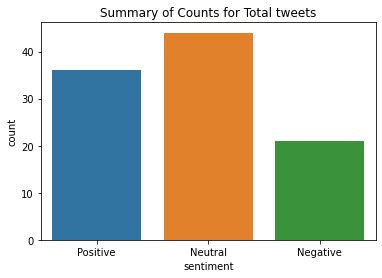

In [ ]:
sns.countplot(tweets_df["sentiment"])
plt.title("Summary of Counts for Total tweets")

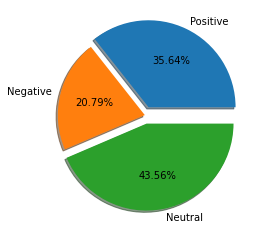

In [ ]:
#Pie chart of summary
a = len(tweets_df[tweets_df['sentiment']== "Positive"]) #positives
b = len(tweets_df[tweets_df['sentiment']== "Negative"]) #Negative
c = len(tweets_df[tweets_df['sentiment']== "Neutral"])
d = np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

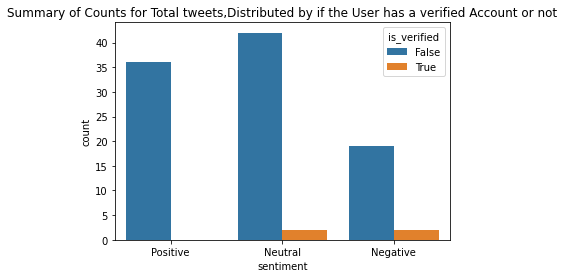

In [ ]:
sns.countplot(tweets_df["sentiment"],hue=tweets_df.is_verified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

In [ ]:
len(tweets_df[tweets_df["is_verified"] == False])

97

#Plot wordcloud 


(-0.5, 399.5, 199.5, -0.5)

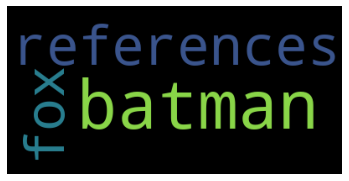

In [ ]:
#Create wordcloud for a single tweet
text = tweets_df['clean_tweet'][2]
wordcloud= WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")


In [ ]:
#function to remove stopwords and topic
def remove_stopwords(message):
  removed = stopwords.words("english")
  new_message = " ".join([word for word in message.split() if word.lower() not in removed])
  new_message = new_message.replace(Topic[0].lower(), "")
  return new_message

## WordCloud on All Tweets

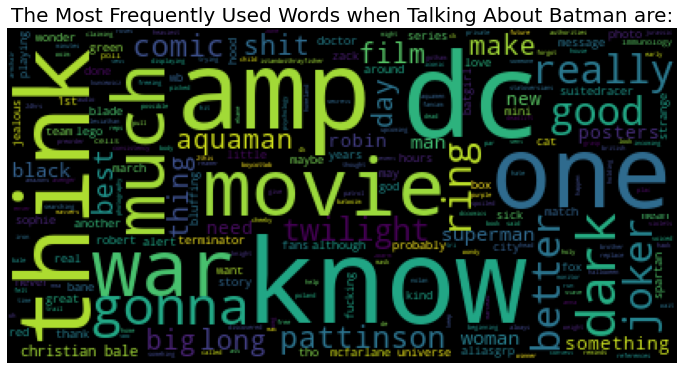

In [ ]:
#join all the text from reviews
text = " ".join(review for review in tweets_df.clean_tweet)
text_new = remove_stopwords(text)
wordcloud = WordCloud(max_words=800,max_font_size=70).generate(text_new)
plt.figure(figsize=(12,8))
plt.title("The Most Frequently Used Words when Talking About {} are:".format(Topic[0]), fontsize = 20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## WordCloud on Positive Tweets

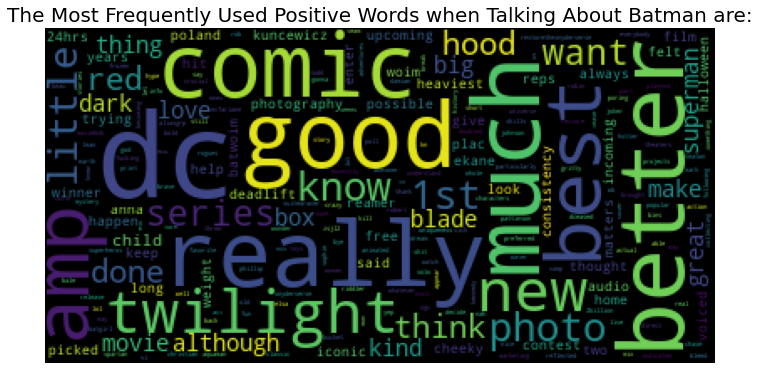

In [ ]:
text = " ".join(review for review in tweets_df[tweets_df["sentiment"]== "Positive"]["clean_tweet"])
text_new = remove_stopwords(text)
wordcloud = WordCloud(max_words=800,max_font_size=70).generate(text_new)
plt.figure(figsize=(12,8))
plt.title("The Most Frequently Used Positive Words when Talking About {} are:".format(Topic[0]), fontsize = 20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## WordCloud on Negative tweets


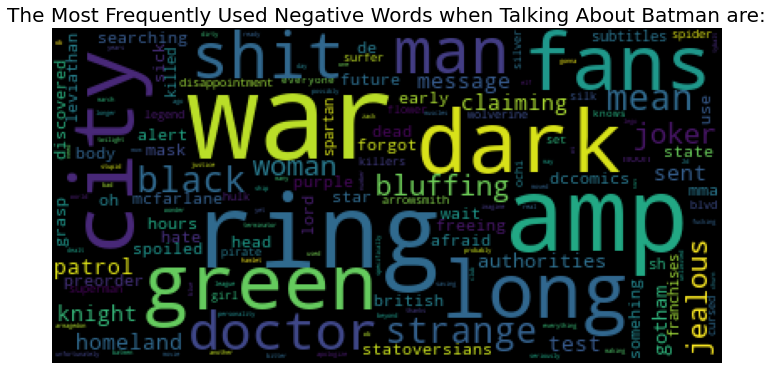

In [ ]:
text = " ".join(review for review in tweets_df[tweets_df["sentiment"]== "Negative"]["clean_tweet"])
text_new = remove_stopwords(text)
wordcloud = WordCloud(max_words=800,max_font_size=70).generate(text_new)
plt.figure(figsize=(12,8))
plt.title("The Most Frequently Used Negative Words when Talking About {} are:".format(Topic[0]), fontsize = 20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Working with Streamlit

In [ ]:
#install stramlit for building the app
!pip install streamlit

In [ ]:
#install ngrok for hosting the URL
!pip install pyngrok

     |████████████████████████████████| 745 kB 4.8 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=eb3936cb476e610e24eb72cd9a046dd2cbfd2dc4cd9a637b41cf84c7334349fe
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
#import stramlit
import streamlit as st

In [ ]:
#write the app
%%writefile app.py
from PIL import Image
image = Image.open("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Analysis/polar-blind-date.png")
st.image(image, caption='Sunrise by the mountains',use_column_width=True) 
st.pyplot()


Overwriting app.py


In [ ]:
!ls

app.py	drive  sample_data


In [ ]:
#Authenticate your ngrok account
!ngrok authtoken 23uIFpPLSzSnBowoCCJuBx6Yg4R_prz4uayfXWQ5S2eCuhL1

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [ ]:
#Start streamlit
!streamlit run app.py&>/dev/null&

In [ ]:
#Check port and status to see if it is running
!pgrep streamlit


784


In [ ]:
#import ngrok to work with python
from pyngrok import ngrok
#Assign a port
public_url = ngrok.connect(port= "8501")

2022-01-19 20:51:02.665 INFO    pyngrok.ngrok: Opening tunnel named: http-80-b3922d10-048c-4875-b336-735470303690
2022-01-19 20:51:02.668 INFO    pyngrok.process.ngrok: t=2022-01-19T20:51:02+0000 lvl=info msg=start pg=/api/tunnels id=e24e26493f64b677
2022-01-19 20:51:02.783 INFO    pyngrok.process.ngrok: t=2022-01-19T20:51:02+0000 lvl=info msg="started tunnel" obj=tunnels name="http-80-b3922d10-048c-4875-b336-735470303690 (http)" addr=http://localhost:80 url=http://2ad2-35-243-209-171.ngrok.io
2022-01-19 20:51:02.790 INFO    pyngrok.process.ngrok: t=2022-01-19T20:51:02+0000 lvl=info msg="started tunnel" obj=tunnels name=http-80-b3922d10-048c-4875-b336-735470303690 addr=http://localhost:80 url=https://2ad2-35-243-209-171.ngrok.io
2022-01-19 20:51:02.794 INFO    pyngrok.process.ngrok: t=2022-01-19T20:51:02+0000 lvl=info msg=end pg=/api/tunnels id=e24e26493f64b677 status=201 dur=118.679969ms
2022-01-19 20:51:02.798 INFO    pyngrok.process.ngrok: t=2022-01-19T20:51:02+0000 lvl=info msg=sta

In [ ]:
public_url

<NgrokTunnel: "http://2ad2-35-243-209-171.ngrok.io" -> "http://localhost:80">